In [1]:
from datetime import datetime 
import pandas as pd
import numpy as np
from Shared.Exchange import exchange





In [2]:
data = exchange.fetch_ohlcv('BTC/USDT:USDT', '1h', 1730406600000, 1440, {
    'until':1730622600000

})



In [3]:
print(len(data))

61


In [4]:
df = pd.DataFrame(data)

61 61
-22.26238498149066


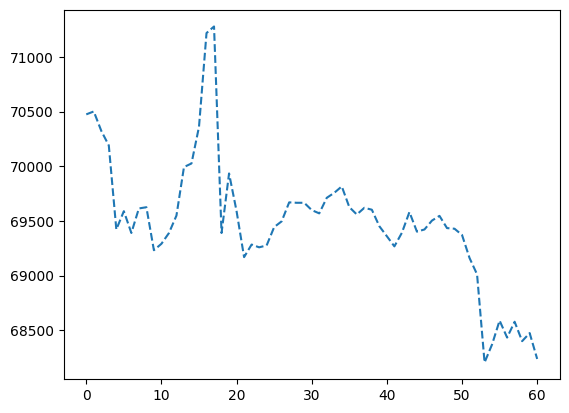

-22.26238498149066
70155.64204124801


In [5]:
import matplotlib.pyplot as plt
import numpy as np
# tohlcv
# df[0] = timestamp
# df[1] = open
# df[2] = high
# df[3] = low
# df[4] = close
# df[5] = volume
y = df[4] = pd.to_numeric(df[4], errors='coerce')
x = [i for i in range(0, len(y))]

# x = df['time'] = pd.to_numeric(df['time'], errors='coerce')
# x = x/1000
# print(x)
print(len(x), len(y))
slope, intercept = np.polyfit(x, y, 1)
print(slope)
plt.plot(x, y, '--')
plt.show()

print(slope )
print(intercept )

-0.02226238498149086
68.2368 60 70.4742 0
Equation of the trendline: y = -0.02x + 70.16


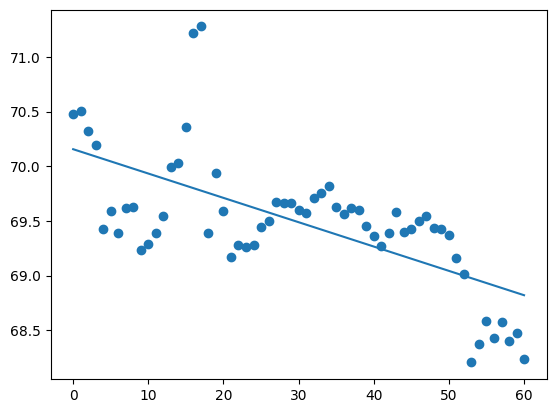

In [6]:
import numpy as np
import matplotlib.pyplot as plt
# tohlcv
# df[0] = timestamp
# df[1] = open
# df[2] = high
# df[3] = low
# df[4] = close
# df[5] = volume
#define data
y = df[4] = pd.to_numeric(df[4], errors='coerce')
x = np.arange(len(y))

y = y/1000
#create scatterplot
plt.scatter(x, y)

#calculate equation for trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(x, p(x))

# angle_rad = np.arctan(-17.258)
# angle_deg = np.degrees(angle_rad)
# print(f"Angle of the slope: {angle_deg} degrees")
print(z[0])
# print((y[len(y)-1] - y[0])/ (x[-1] - x[0]))
print(y[len(y)-1] , x[-1],y[0] , x[0])
print(f"Equation of the trendline: y = {z[0]:.2f}x + {z[1]:.2f}")
plt.show()


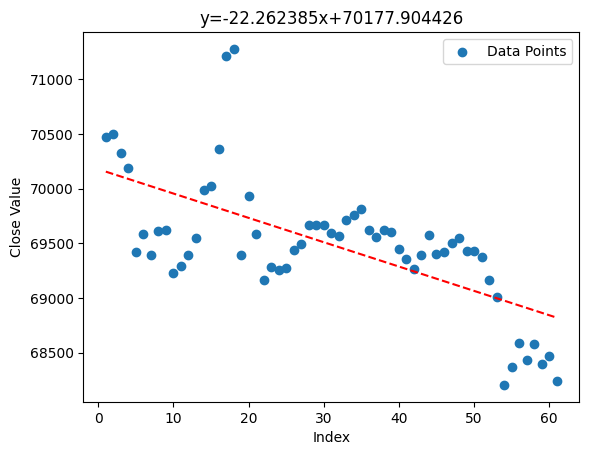

y = -22.26x + 70177.90


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is a DataFrame and 'close' is one of its columns
# Replace this line with your DataFrame definition

# tohlcv
# df[0] = timestamp
# df[1] = open
# df[2] = high
# df[3] = low
# df[4] = close
# df[5] = volume
# Convert 'close' to numeric, ignoring errors
y = pd.to_numeric(df[4], errors='coerce')
x = [i for i in range(1, len(y)+1)]

# Create scatterplot
plt.scatter(x, y, label='Data Points')

# Calculate equation for trendline
z = np.polyfit(x, y, 1)  # Returns coefficients [slope, intercept]
p = np.poly1d(z)

# Add trendline to plot
plt.plot(x, p(x),"r--", )
plt.title("y=%.6fx+%.6f"%(z[0],z[1])) 
# Add labels and title
plt.xlabel('Index')
plt.ylabel('Close Value')

plt.legend()

# Display the plot
plt.show()
print(f"y = {z[0]:.2f}x + {z[1]:.2f}")

C:\Users\F07\AppData\Local\Temp\ipykernel_29744\1228076797.py:23: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  df_dx = derivative(f, x_fake, dx=1e-6)


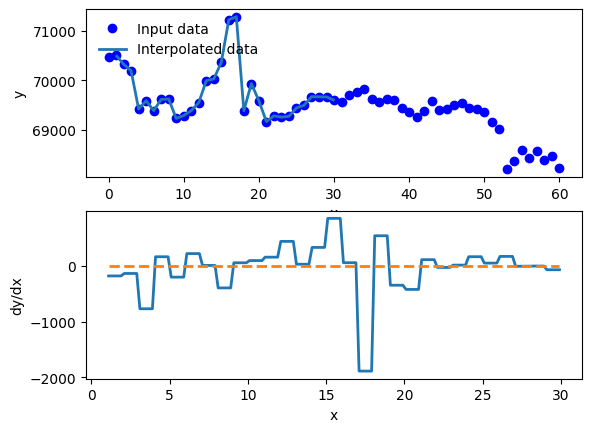

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.misc import derivative


# tohlcv
# df[0] = timestamp
# df[1] = open
# df[2] = high
# df[3] = low
# df[4] = close
# df[5] = volume
y = df[4] = pd.to_numeric(df[4], errors='coerce')
x = np.arange(len(y))


# Simple interpolation of x and y    
f = interp1d(x, y)
x_fake = np.arange(1.1, 30, 0.1)

# derivative of y with respect to x
df_dx = derivative(f, x_fake, dx=1e-6)

# Plot
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.errorbar(x, y, fmt="o", color="blue", label='Input data')
ax1.errorbar(x_fake, f(x_fake), label="Interpolated data", lw=2)
ax1.set_xlabel("x")
ax1.set_ylabel("y")

ax2.errorbar(x_fake, df_dx, lw=2)
ax2.errorbar(x_fake, np.array([0 for i in x_fake]), ls="--", lw=2)
ax2.set_xlabel("x")
ax2.set_ylabel("dy/dx")

leg = ax1.legend(loc=2, numpoints=1,scatterpoints=1)
leg.draw_frame(False)

In [9]:
import pandas as pd
import numpy as np
from Shared.Constant import TrendValues

def determine_trend(df, period=50):
    """
    Determine the trend of a market based on the moving average and slope.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing the OHLC data.
    period (int): Period for the moving average.

    Returns:
    str: 'Uptrend', 'Downtrend', or 'Sideways'
    """

    if len(df) < period:
        raise ValueError("Not enough data points to calculate the moving average for the given period.")

    # Calculate the moving average
    df['MA'] = df[4].rolling(window=period).mean()

    # Calculate the slope (using linear regression on the last 'period' points)
    df['slope'] = np.polyfit(range(period), df[4].tail(period), 1)[0]

    # Determine the trend
    if df['slope'].iloc[-1] > 0 and df[4].iloc[-1] > df['MA'].iloc[-1]:
        return TrendValues.UPTREND.value
    elif df['slope'].iloc[-1] < 0 and df[4].iloc[-1] < df['MA'].iloc[-1]:
        return TrendValues.DOWNTREND.value
    else:
        return TrendValues.SIDEWAYS.value


# Example with a 50-period moving average
trend = determine_trend(df, period=50)
print(f"The current trend is: {trend}")
df


The current trend is: DOWNTREND


,0,1,2,3,4,5,MA,slope
0,1730408400000,70057.9,70569.9,69878.4,70474.2,905.02,NaN,-29.446276
1,1730412000000,70474.0,70557.9,70190.0,70501.0,555.23,NaN,-29.446276
2,1730415600000,70501.0,70668.7,70319.2,70323.1,748.59,NaN,-29.446276
3,1730419200000,70323.1,70495.3,70163.2,70189.7,647.93,NaN,-29.446276
4,1730422800000,70189.7,70387.3,69310.4,69421.3,2293.35,NaN,-29.446276
...,...,...,...,...,...,...,...,...
56,1730610000000,68588.1,68694.0,68422.0,68432.5,681.12,69503.600,-29.446276
57,1730613600000,68431.6,68776.4,68384.3,68577.0,618.80,69482.868,-29.446276
58,1730617200000,68576.8,68703.8,68368.7,68399.6,583.00,69458.364,-29.446276
59,1730620800000,68399.6,68609.7,68292.2,68473.5,819.85,69443.202,-29.446276
